# Montes Claros intrusion of Goias Alkaline Province

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import pandas as pd

In [3]:
notebook_name = 'MC_intrusion_plot.ipynb'

#### Open a dictionary

In [4]:
data_set = dict()

#### Saving files

In [5]:
saved_files = []

## Loading real data for Diorama complex

### Columns to load and filename

In [6]:
filename = 'data_filtered_XYZ_area_40'

In [7]:
names = ['X','Y','GPSALT','MAGRAW','MAGIGRF','IGRF','LONG','LAT']

### Real data

In [8]:
data = pd.read_csv(filename,usecols=(0,1,2,3,4,5,6,7),na_values= '*',
                   names=names,skipinitialspace=True,delim_whitespace=True).dropna(axis=0)

## Properties of survey

### Total field anomaly 

In [9]:
data_set['tfa_40'] = data.iloc[:,4].get_values()

#### Observation coordinates

In [10]:
data_set['x'] = data.iloc[:,1].get_values()

In [11]:
data_set['y'] = data.iloc[:,0].get_values()

In [12]:
data_set['height'] = -100.

In [13]:
data_set['z'] = data_set['height']*np.ones_like(data_set['x'])

#### Survey information

In [14]:
data_set['N'] = np.size(data_set['tfa_40'])

In [15]:
data_set['dx'] = data_set['x'][0] - data_set['x'][1]

In [16]:
Nx = abs(int(((data_set['x'].max() - data_set['x'].min())/(data_set['dx']))))

In [17]:
Ny = data_set['N']/Nx

In [18]:
data_set['dy'] = abs(int(((data_set['y'].max() - data_set['y'].min())/(Ny-1))))

In [19]:
data_set['shape'] = Nx,Ny

In [20]:
print 'Shape : (%.0f,%.0f)'% data_set['shape'] 
print 'Number of data: %.1f' % data_set['N']
print 'dx: %.1f m' % data_set['dx']
print 'dy: %.1f m ' % data_set['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


#### Main field

In [21]:
inc_gf = -19.5

In [22]:
dec_gf = -18.5

In [23]:
data_set['main_field'] = inc_gf,dec_gf 

In [24]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Real data visualization for Montes claros complex

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


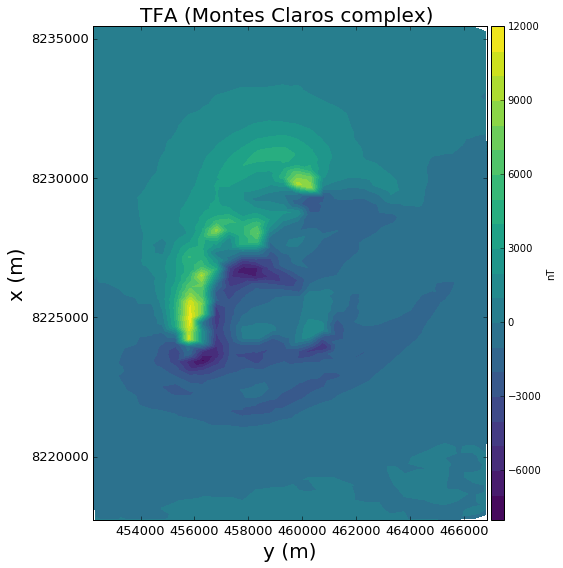

In [25]:
title_font = 20
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(8,8), tight_layout=True)

plt.tricontourf(data_set['y'],data_set['x'],data_set['tfa_40'],20, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (Montes Claros complex) ', fontsize=title_font)
plt.xlim(data_set['y'].min(),data_set['y'].max())
plt.ylim(data_set['x'].min(),data_set['x'].max())
plt.tick_params(labelsize=13)

plt.show()

## Generating .pickle file

In [26]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
data_set['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [27]:
file_name = 'data/data_set.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data_set, f)
    
saved_files.append(file_name)

## Saved files

In [28]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  data/data_set.pickle
